In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv("diabetes.csv")

# Show first 5 rows
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Summary info about dataset
df.info()

# Check for missing values
print("\nMissing values per column:\n", df.isnull().sum())

# Basic statistics
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB

Missing values per column:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
A

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
import numpy as np

cols_with_zero_missing = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace 0 with np.nan
df[cols_with_zero_missing] = df[cols_with_zero_missing].replace(0, np.nan)

# Fill missing values with mean of each column
for col in cols_with_zero_missing:
    df[col].fillna(df[col].mean(), inplace=True)

# Check again
print(df.isnull().sum())


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


<ipython-input-4-ac6e419cf8d8>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [5]:
import numpy as np

cols_with_zero_missing = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace 0 with np.nan for these columns
df[cols_with_zero_missing] = df[cols_with_zero_missing].replace(0, np.nan)

# Fill missing values with the mean of each column without inplace to avoid FutureWarning
for col in cols_with_zero_missing:
    df[col] = df[col].fillna(df[col].mean())

# Check for any remaining missing values
print(df.isnull().sum())


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


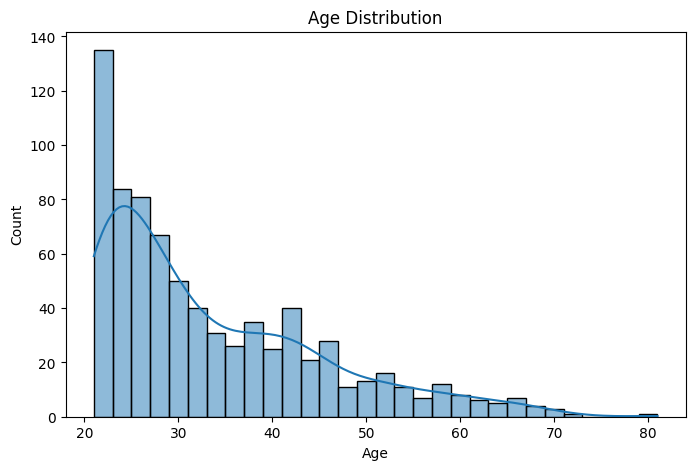

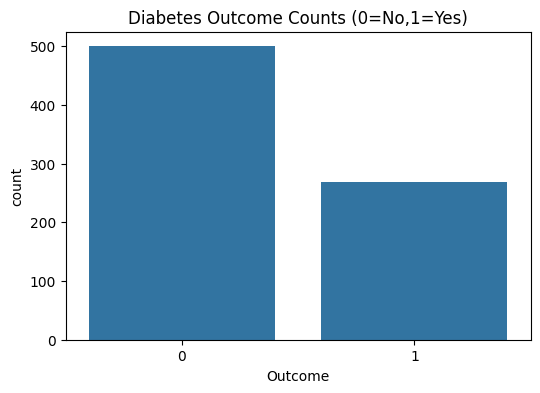

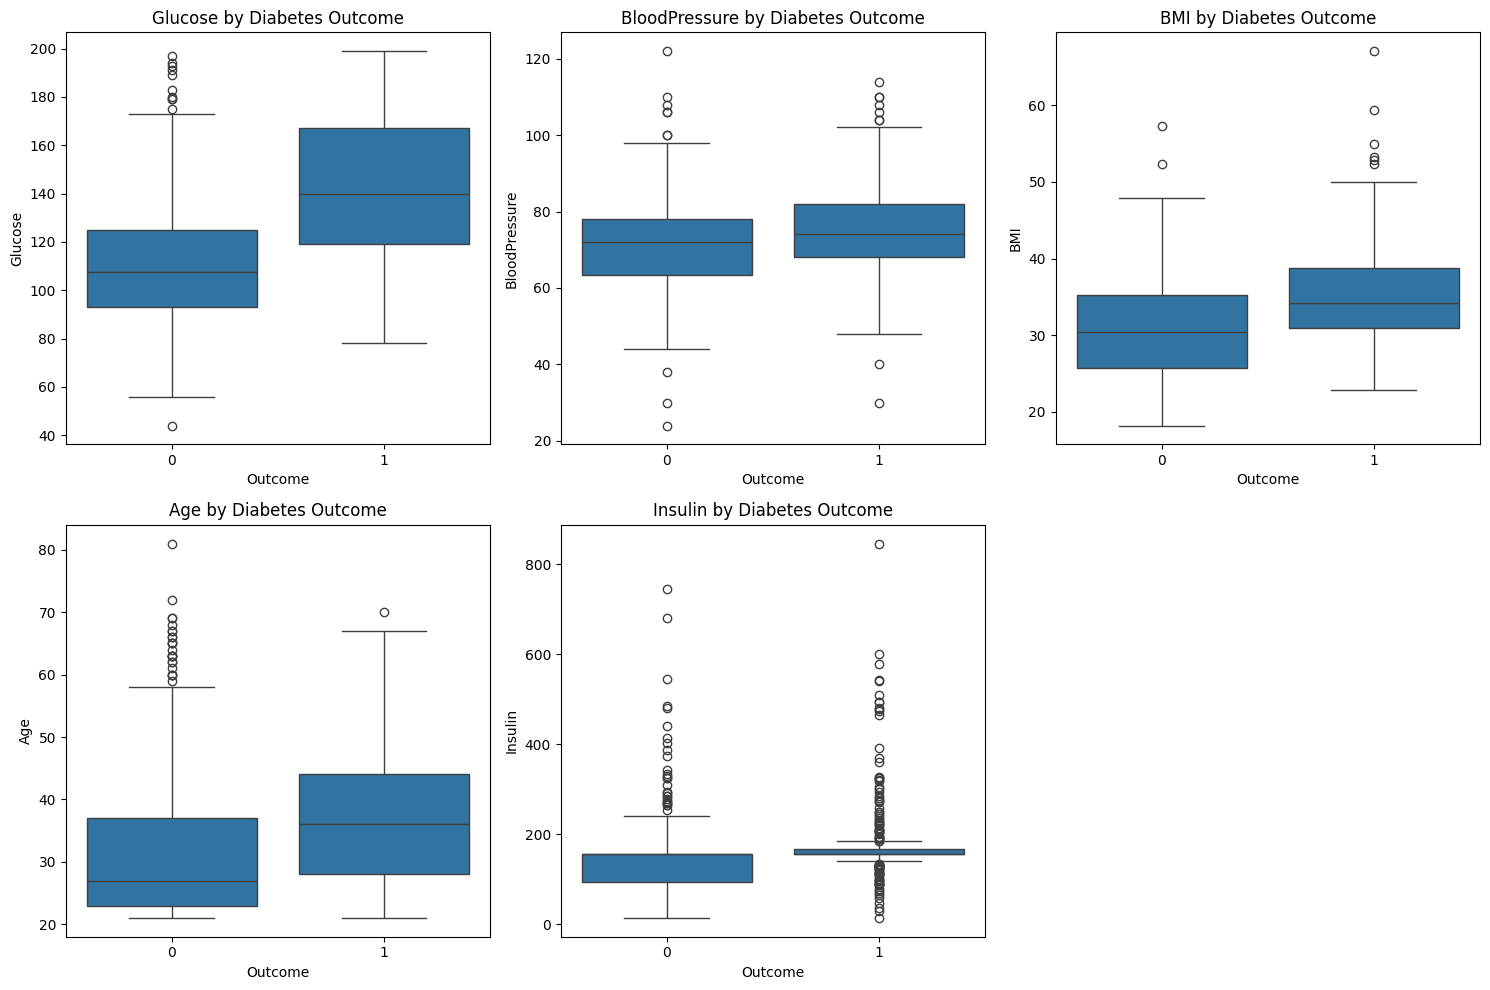

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Age distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

# 2. Outcome counts
plt.figure(figsize=(6,4))
sns.countplot(x='Outcome', data=df)
plt.title("Diabetes Outcome Counts (0=No,1=Yes)")
plt.show()

# 3. Boxplots for numeric variables by Outcome
num_cols = ['Glucose', 'BloodPressure', 'BMI', 'Age', 'Insulin']
plt.figure(figsize=(15,10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Outcome', y=col, data=df)
    plt.title(f"{col} by Diabetes Outcome")
plt.tight_layout()
plt.show()


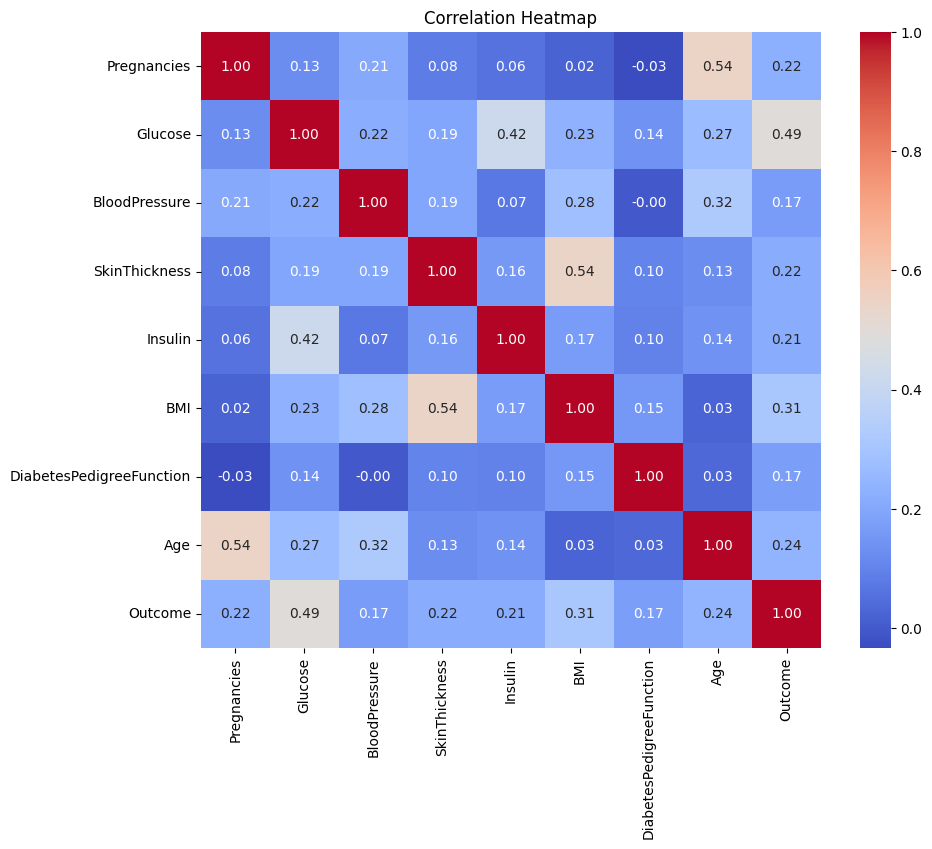

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(10, 8))

# Calculate correlation matrix
corr_matrix = df.corr()

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()



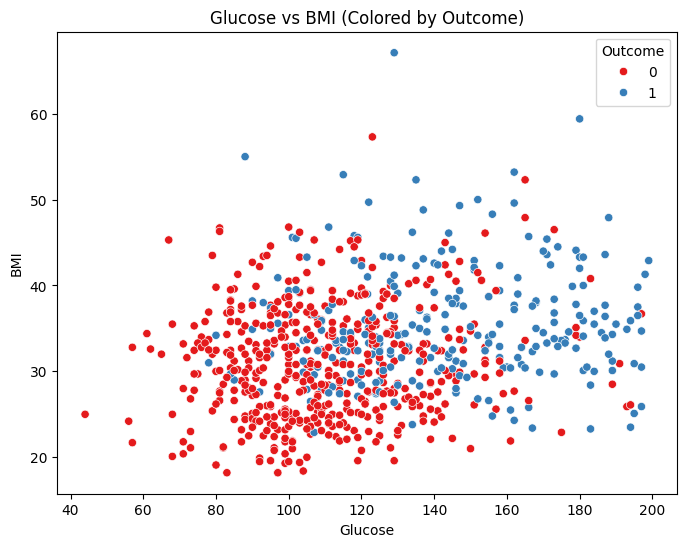

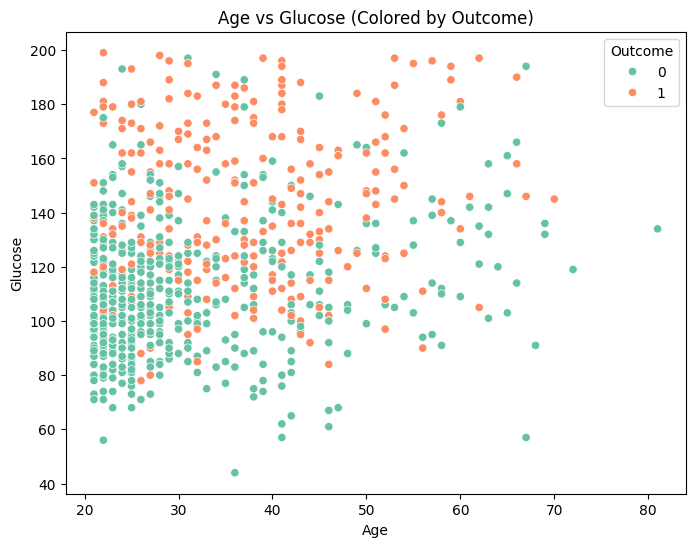

In [8]:
# Glucose vs BMI colored by Outcome
plt.figure(figsize=(8,6))
sns.scatterplot(x='Glucose', y='BMI', hue='Outcome', data=df, palette='Set1')
plt.title('Glucose vs BMI (Colored by Outcome)')
plt.show()

# Age vs Glucose colored by Outcome
plt.figure(figsize=(8,6))
sns.scatterplot(x='Age', y='Glucose', hue='Outcome', data=df, palette='Set2')
plt.title('Age vs Glucose (Colored by Outcome)')
plt.show()


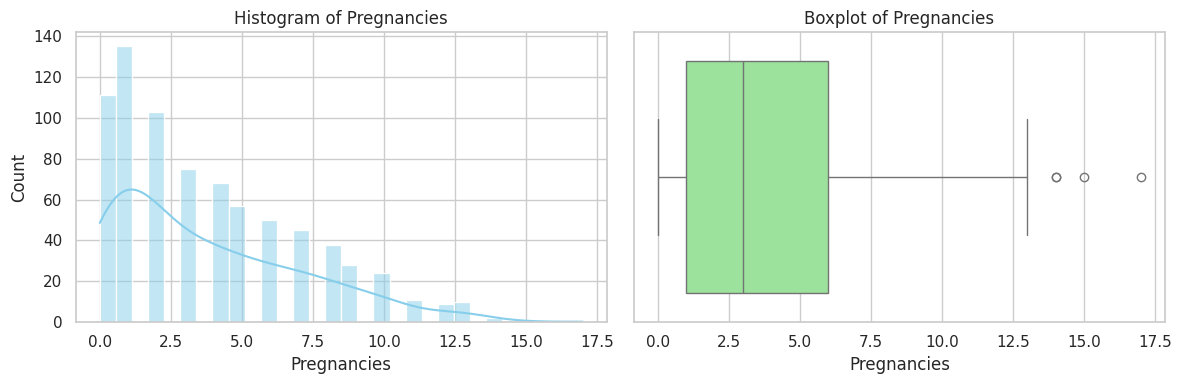

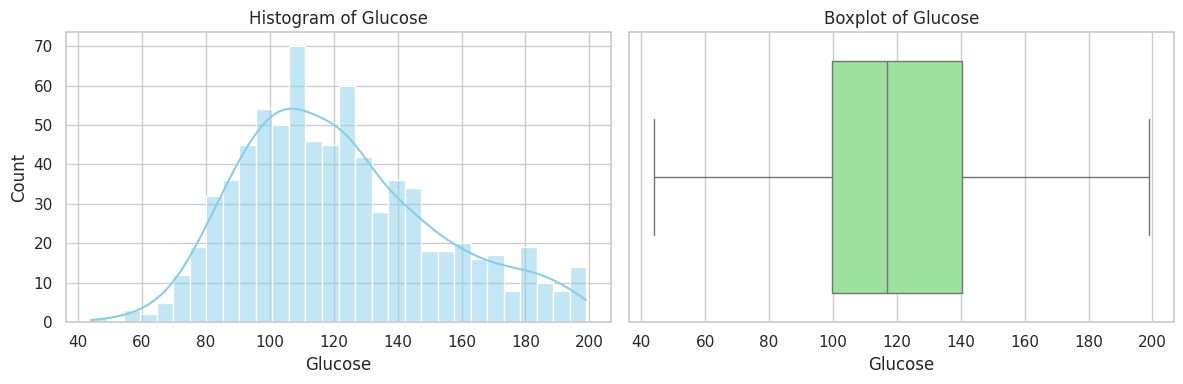

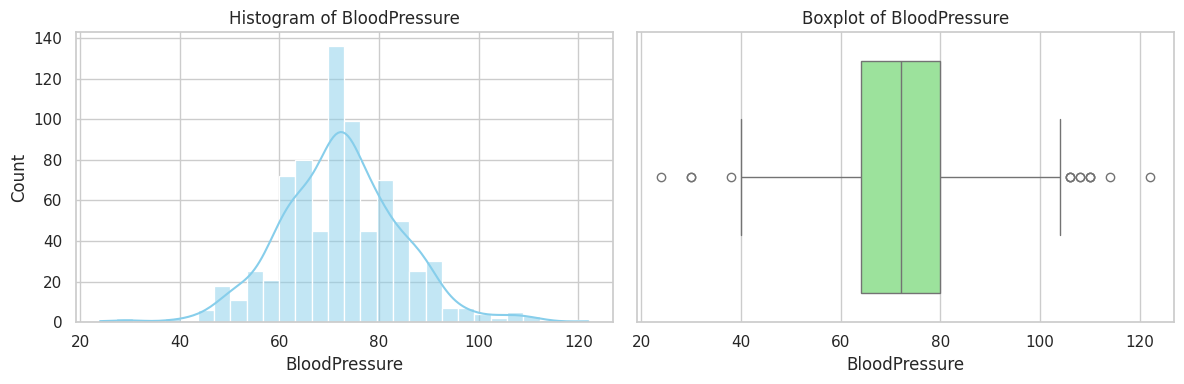

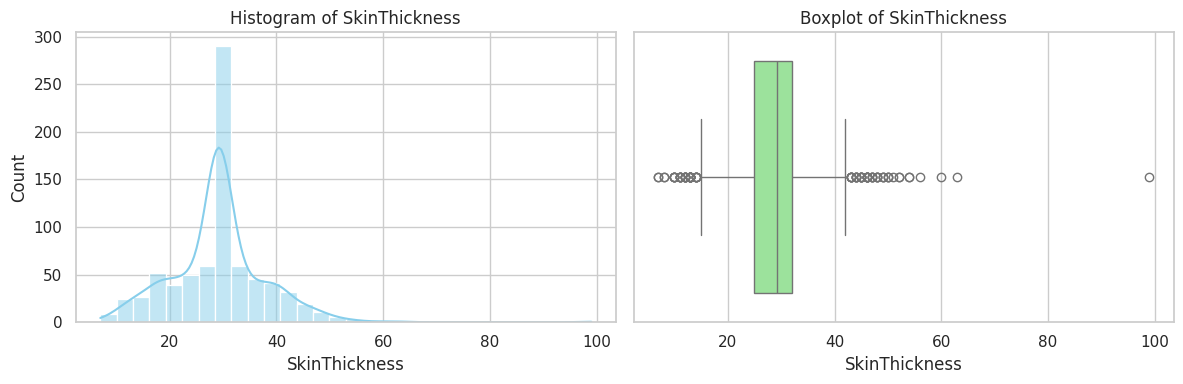

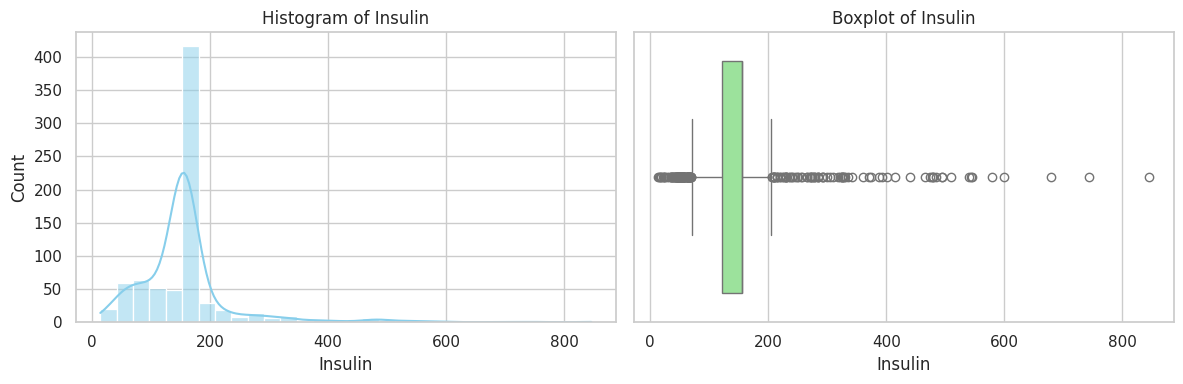

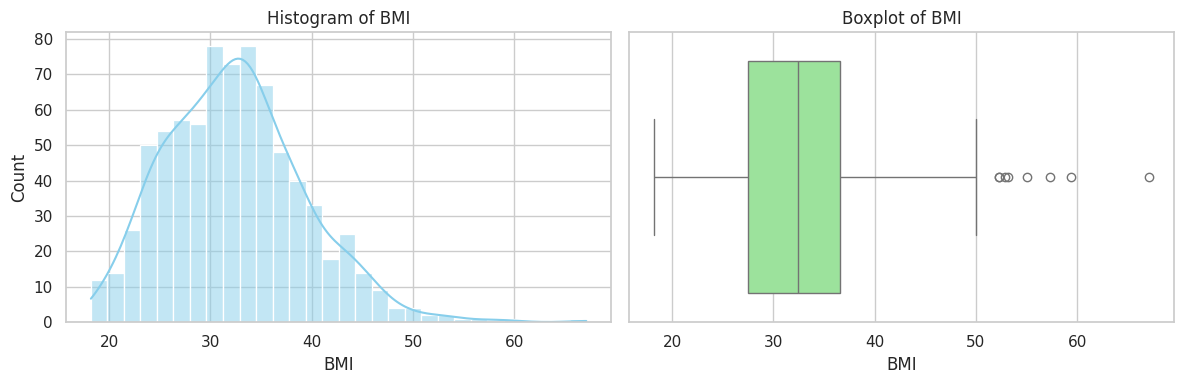

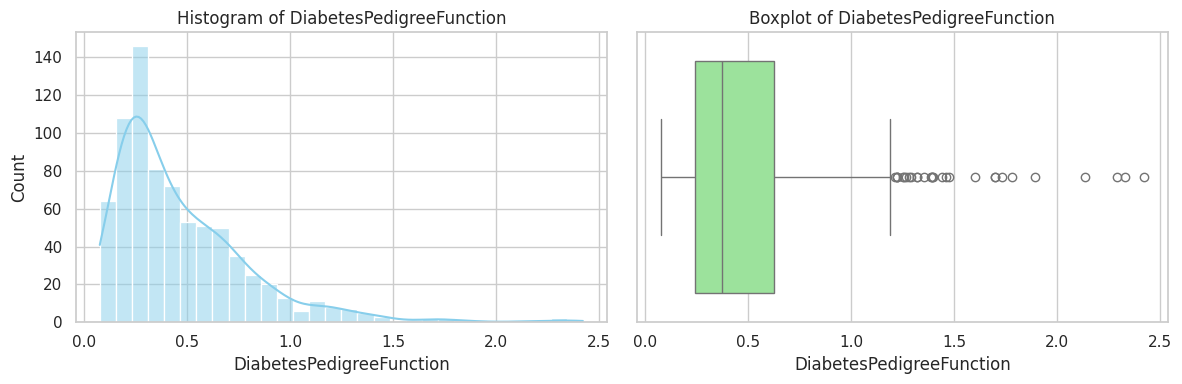

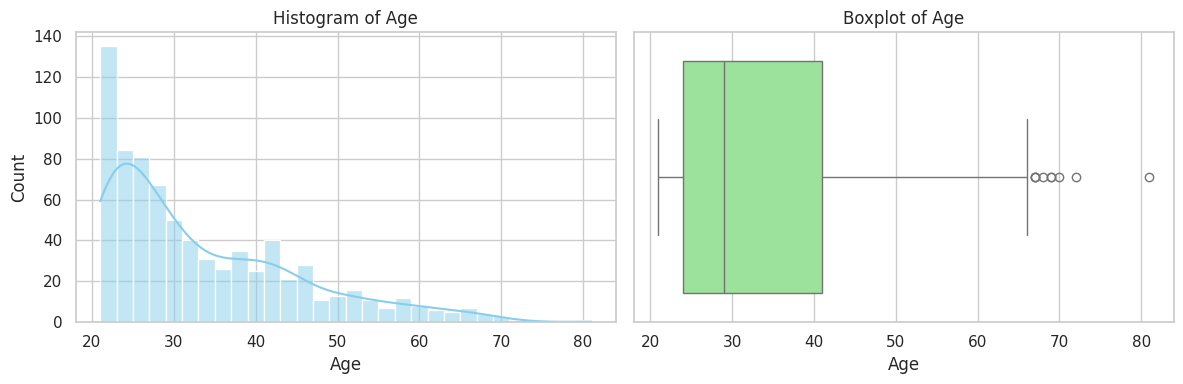

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style="whitegrid")

# Plot histograms and boxplots for all features
numeric_cols = df.columns[:-1]  # exclude 'Outcome' for now

for col in numeric_cols:
    plt.figure(figsize=(12, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Histogram of {col}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()


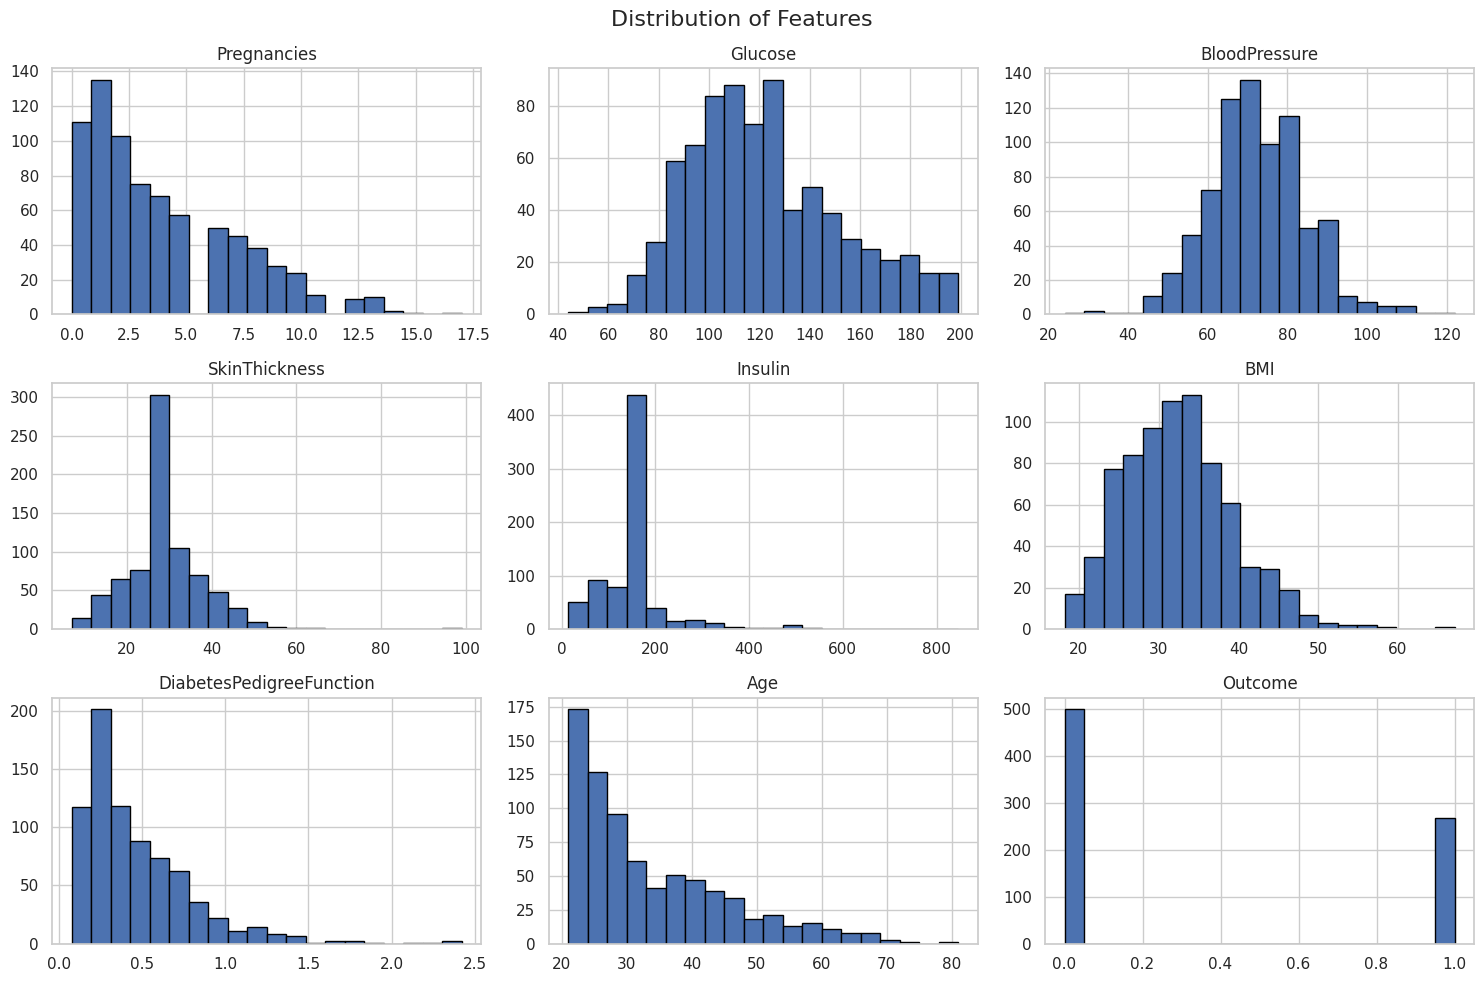

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram for all numerical columns
df.hist(bins=20, figsize=(15, 10), edgecolor='black')
plt.suptitle('Distribution of Features', fontsize=16)
plt.tight_layout()
plt.show()


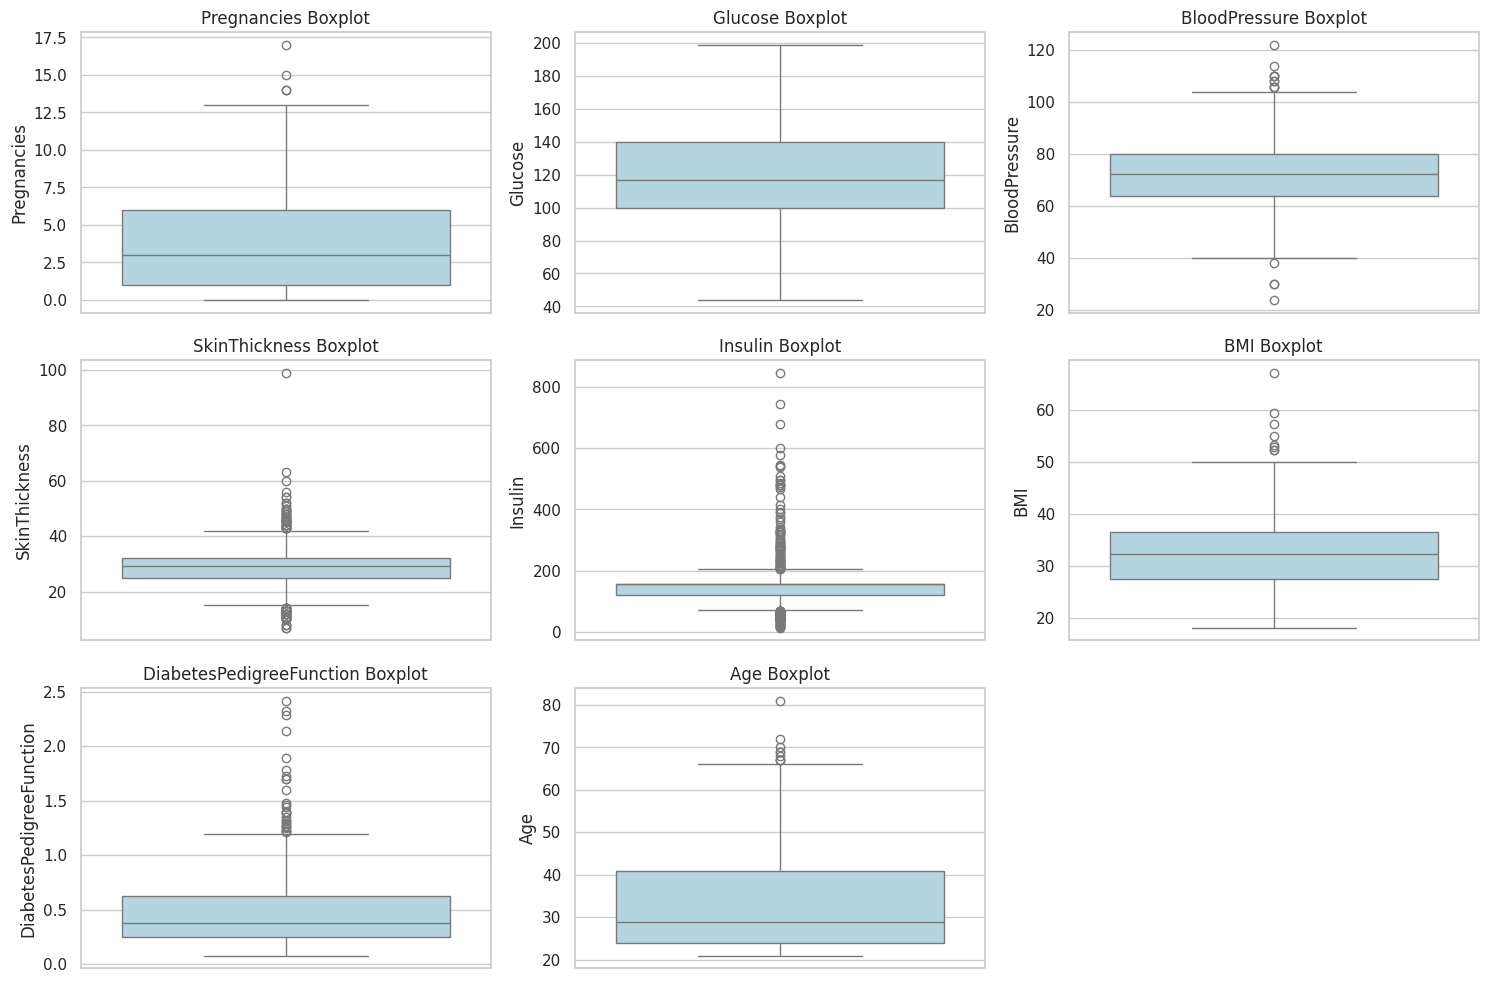

In [11]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns[:-1]):  # Skip 'Outcome'
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df[col], color='lightblue')
    plt.title(f'{col} Boxplot')
plt.tight_layout()
plt.show()


<ipython-input-12-0bf6eb10bfcd>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=col, data=df, palette='Set2')
<ipython-input-12-0bf6eb10bfcd>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=col, data=df, palette='Set2')
<ipython-input-12-0bf6eb10bfcd>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=col, data=df, palette='Set2')
<ipython-input-12-0bf6eb10bfcd>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `h

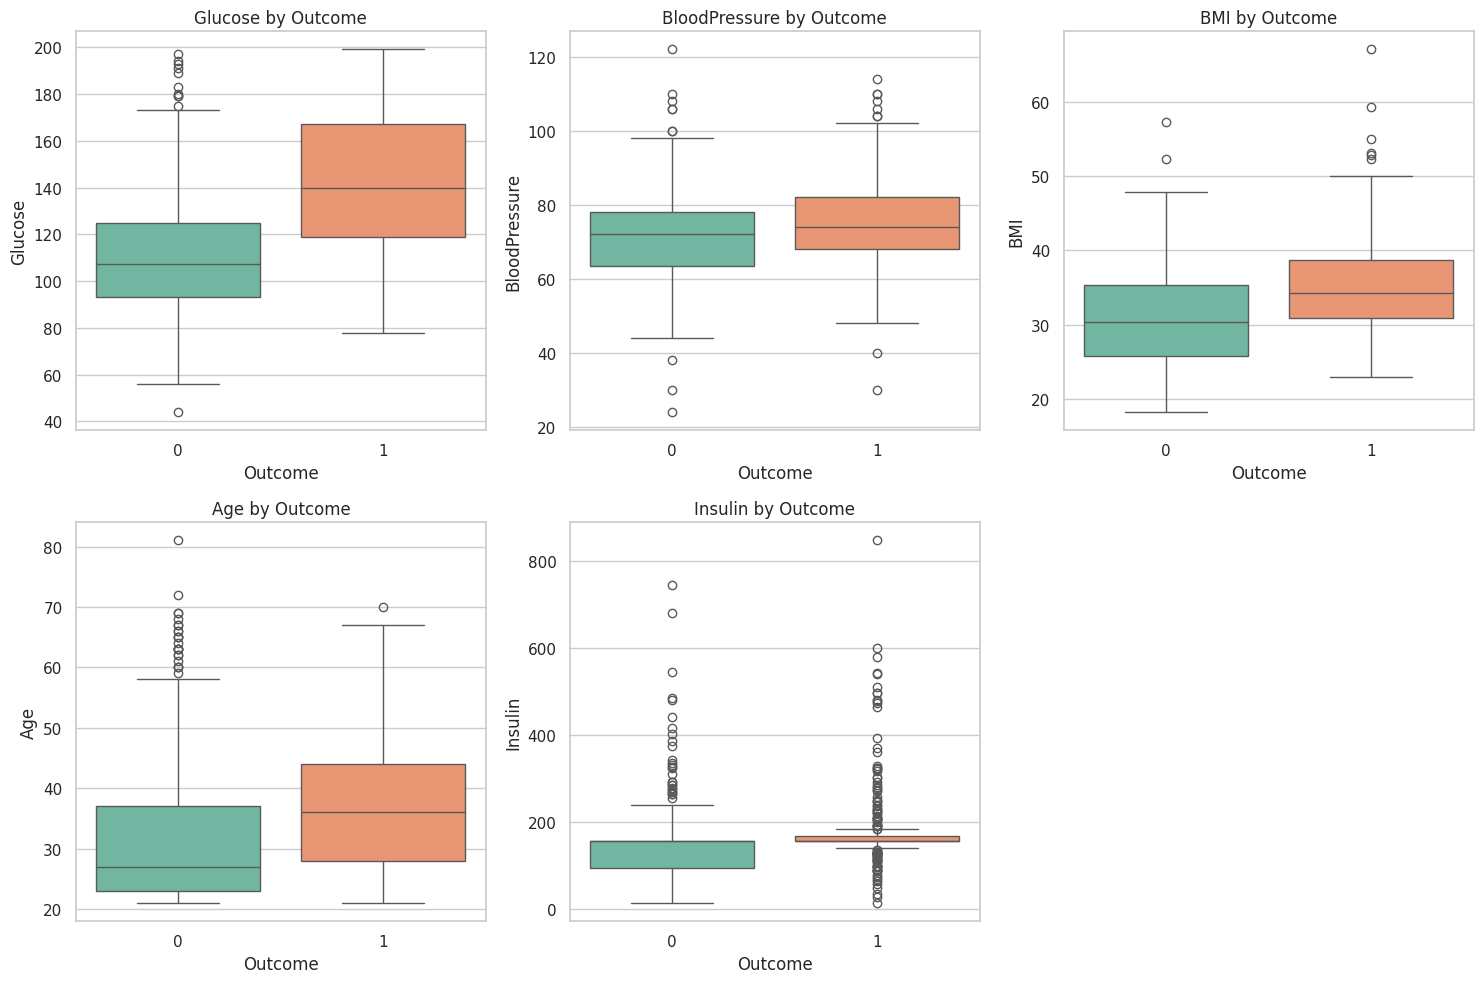

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

features = ['Glucose', 'BloodPressure', 'BMI', 'Age', 'Insulin']

plt.figure(figsize=(15, 10))
for i, col in enumerate(features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='Outcome', y=col, data=df, palette='Set2')
    plt.title(f'{col} by Outcome')
plt.tight_layout()
plt.show()


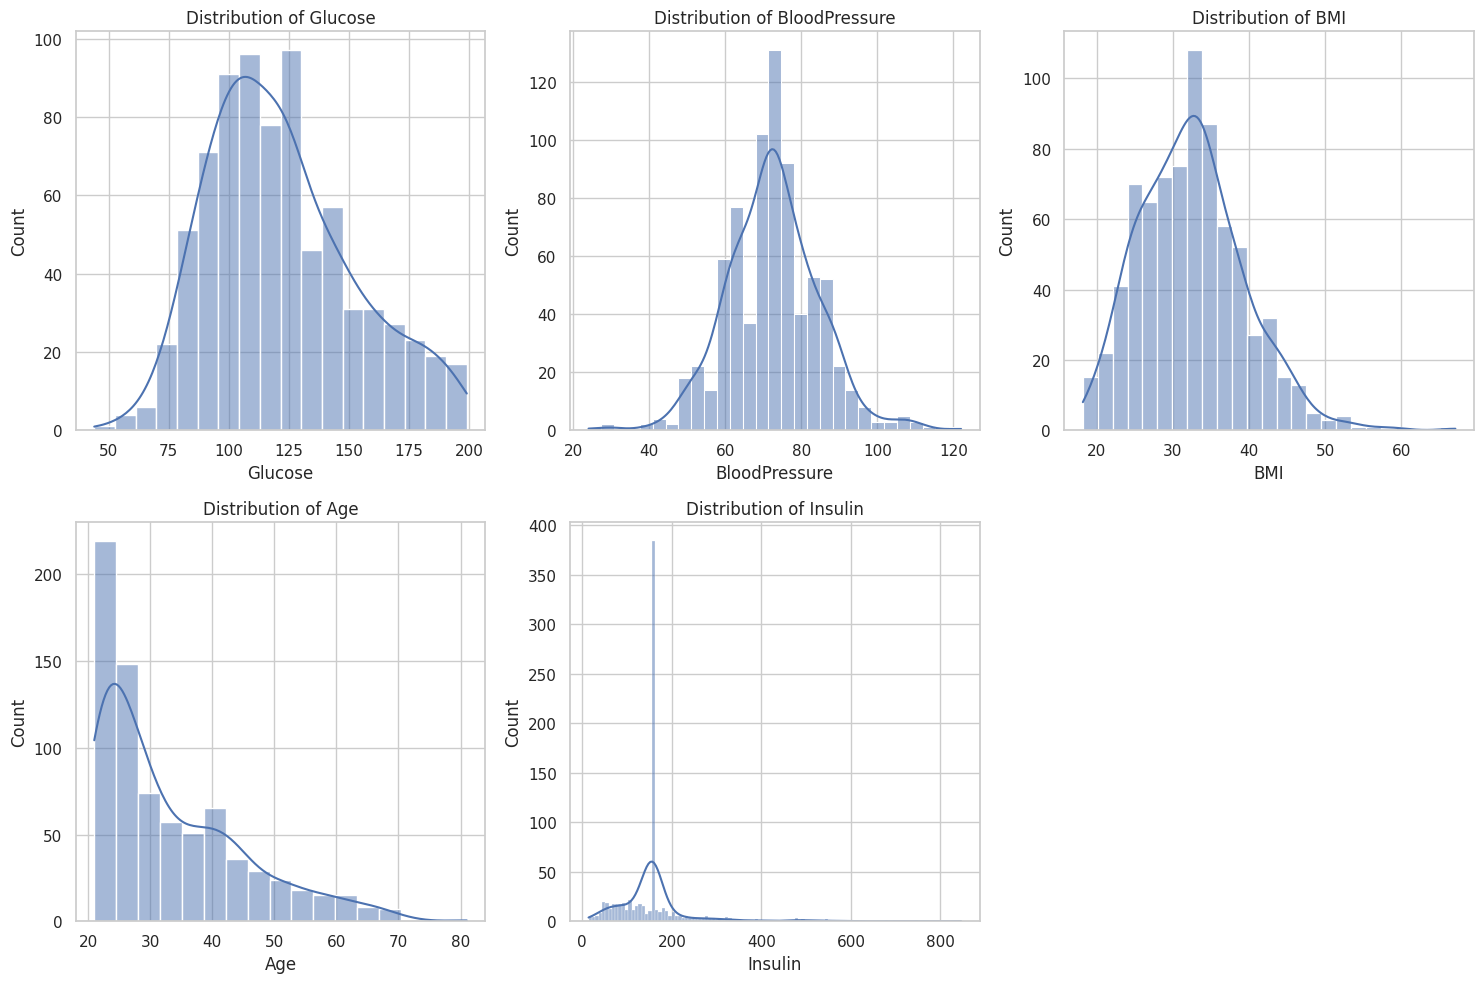

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of important columns
features = ['Glucose', 'BloodPressure', 'BMI', 'Age', 'Insulin']

# Plotting distributions
plt.figure(figsize=(15, 10))
for i, col in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


In [14]:
# Replace 0s with NaN in relevant columns
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_zeros] = df[cols_with_zeros].replace(0, np.nan)

# Fill missing (NaN) values with median of each column
for col in cols_with_zeros:
    df[col].fillna(df[col].median(), inplace=True)

# Check again for missing values
print(df.isnull().sum())


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


<ipython-input-14-e5d5ab9c27f1>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


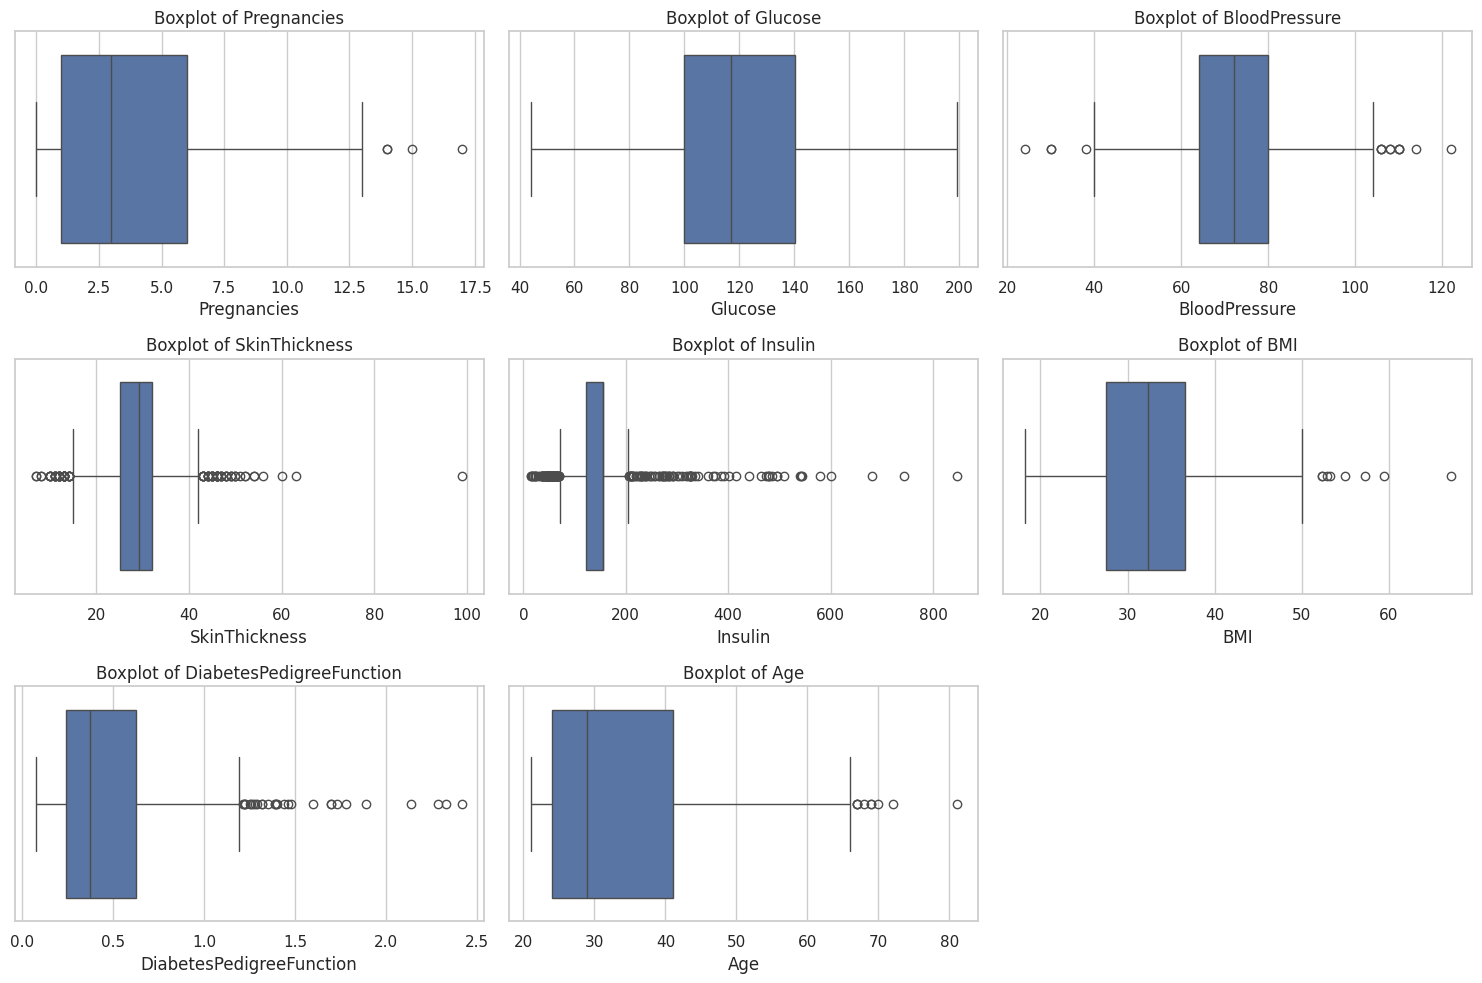

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot boxplots for numeric features
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns[:-1], 1):  # Skip 'Outcome'
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


In [16]:
# Function to cap outliers using IQR method
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower=lower_limit, upper=upper_limit)

# Cap outliers in 'Insulin' and 'DiabetesPedigreeFunction'
cap_outliers(df, 'Insulin')
cap_outliers(df, 'DiabetesPedigreeFunction')

# Check updated summary
df[['Insulin', 'DiabetesPedigreeFunction']].describe()


,Insulin,DiabetesPedigreeFunction
count,768.000000,768.000000
mean,143.937487,0.458914
std,39.496793,0.285596
min,70.427665,0.078000
25%,121.500000,0.243750
50%,155.548223,0.372500
75%,155.548223,0.626250
max,206.620558,1.200000


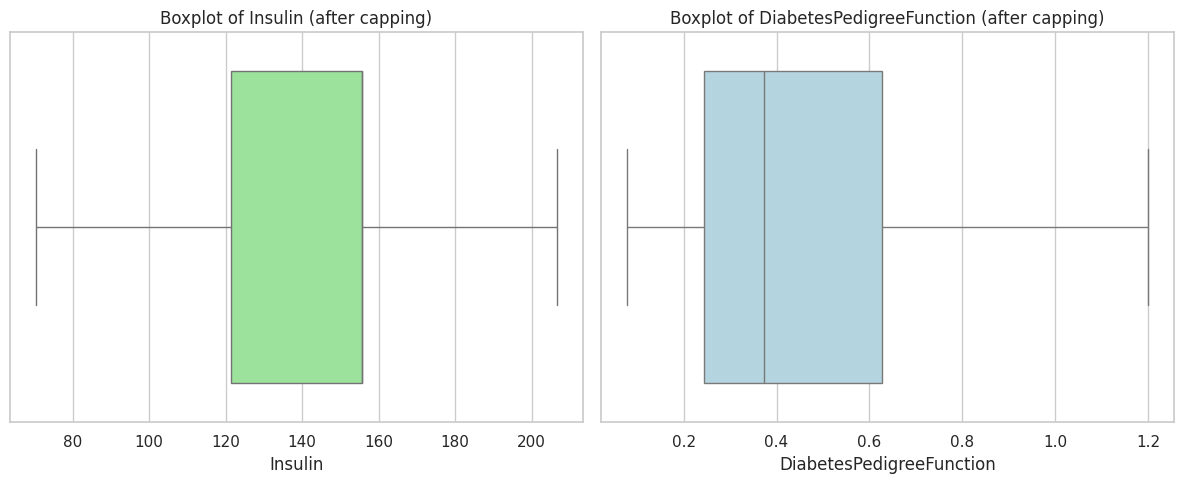

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the boxplots again after capping
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['Insulin'], color='lightgreen')
plt.title('Boxplot of Insulin (after capping)')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['DiabetesPedigreeFunction'], color='lightblue')
plt.title('Boxplot of DiabetesPedigreeFunction (after capping)')

plt.tight_layout()
plt.show()


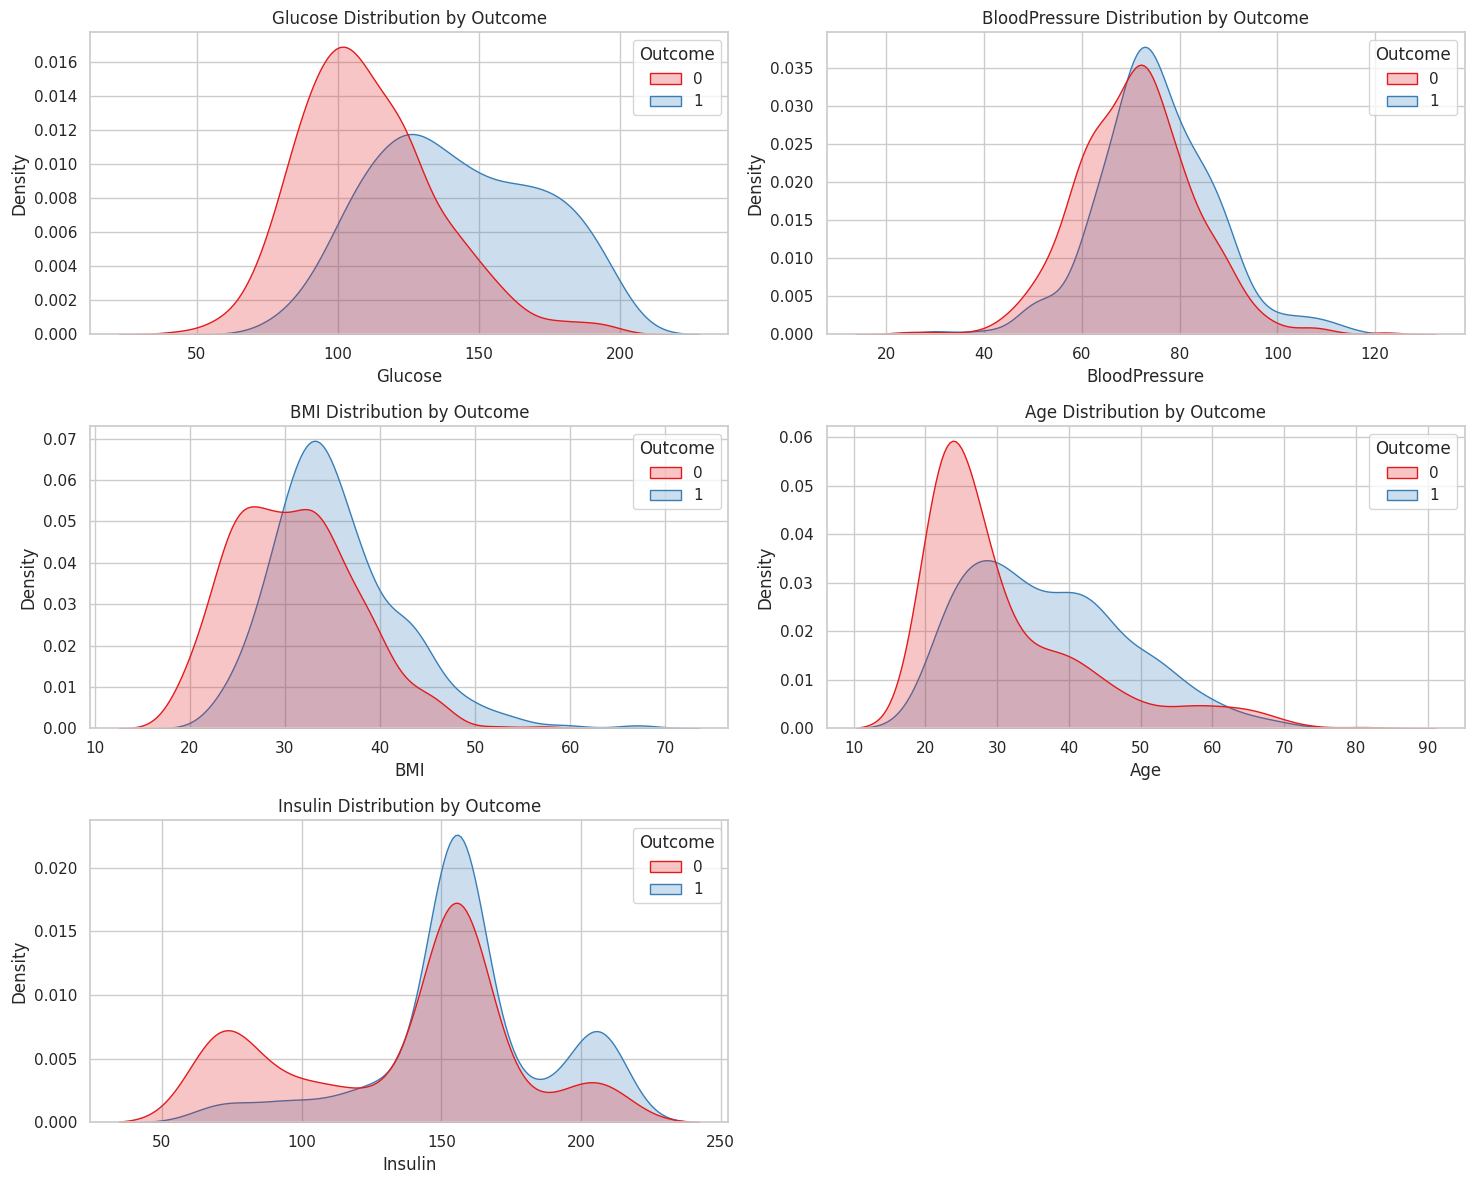

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Features to compare
features = ['Glucose', 'BloodPressure', 'BMI', 'Age', 'Insulin']

# Plot distribution plots by Outcome
plt.figure(figsize=(15, 12))

for i, feature in enumerate(features, 1):
    plt.subplot(3, 2, i)
    sns.kdeplot(data=df, x=feature, hue='Outcome', fill=True, common_norm=False, palette='Set1')
    plt.title(f'{feature} Distribution by Outcome')

plt.tight_layout()
plt.show()


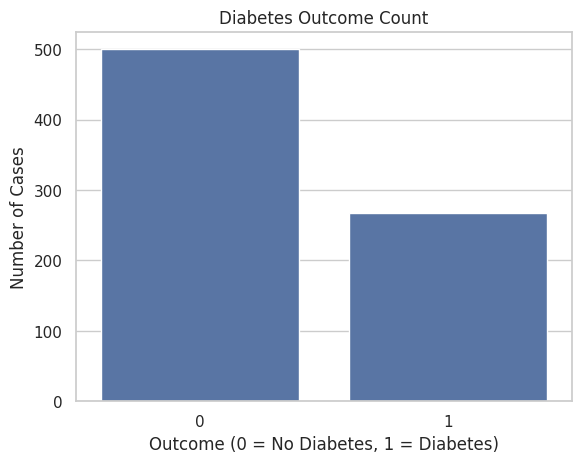

Outcome
0    500
1    268
Name: count, dtype: int64


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot of Outcome
sns.countplot(x='Outcome', data=df)
plt.title('Diabetes Outcome Count')
plt.xlabel('Outcome (0 = No Diabetes, 1 = Diabetes)')
plt.ylabel('Number of Cases')
plt.show()

# Value counts
print(df['Outcome'].value_counts())


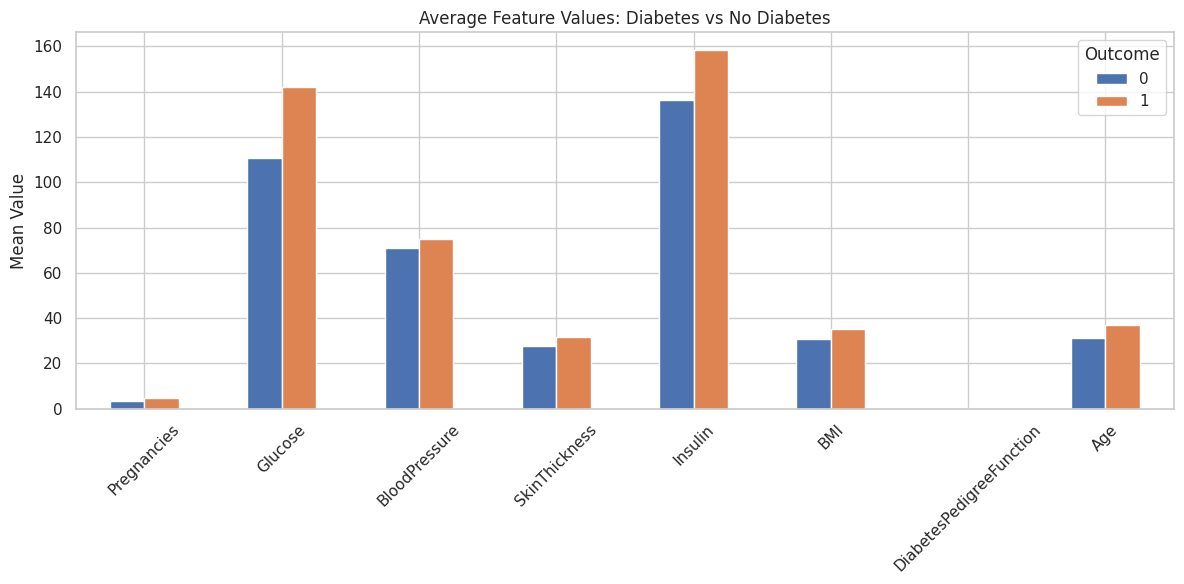

Outcome                            0           1
Pregnancies                 3.298000    4.865672
Glucose                   110.710121  142.165573
BloodPressure              70.935397   75.147324
SkinThickness              27.768651   31.736944
Insulin                   136.246832  158.285722
BMI                        30.888434   35.384757
DiabetesPedigreeFunction    0.420264    0.531022
Age                        31.190000   37.067164


In [20]:
# Group-wise mean comparison
grouped_means = df.groupby('Outcome').mean().T
grouped_means.plot(kind='bar', figsize=(12, 6))
plt.title('Average Feature Values: Diabetes vs No Diabetes')
plt.ylabel('Mean Value')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Show exact numbers
print(grouped_means)


CHECK AND HANDLE INVALID VALUES(LIKE ZEROS)

In [21]:
import numpy as np

# List of columns where zero is biologically invalid
invalid_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace 0 with NaN in those columns
df[invalid_cols] = df[invalid_cols].replace(0, np.nan)

# Check how many missing values now
print(df.isnull().sum())


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [22]:
# Fill missing values with median for each column
df.fillna(df.median(), inplace=True)

# Verify again
print(df.isnull().sum())  # should all be 0


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Feature scaling (standardization)

In [24]:
from sklearn.preprocessing import StandardScaler

# Features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'SVM': SVC(kernel='rbf')
}

# Train and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n📊 {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))



📊 Logistic Regression
Accuracy: 0.7077922077922078
Confusion Matrix:
 [[82 18]
 [27 27]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.82      0.78       100
           1       0.60      0.50      0.55        54

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154


📊 Random Forest
Accuracy: 0.7467532467532467
Confusion Matrix:
 [[85 15]
 [24 30]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.85      0.81       100
           1       0.67      0.56      0.61        54

    accuracy                           0.75       154
   macro avg       0.72      0.70      0.71       154
weighted avg       0.74      0.75      0.74       154


📊 KNN
Accuracy: 0.7532467532467533
Confusion Matrix:
 [[82 18]
 [20 34]]
Classification Report:
               precision   

Visualize accuracy of each model

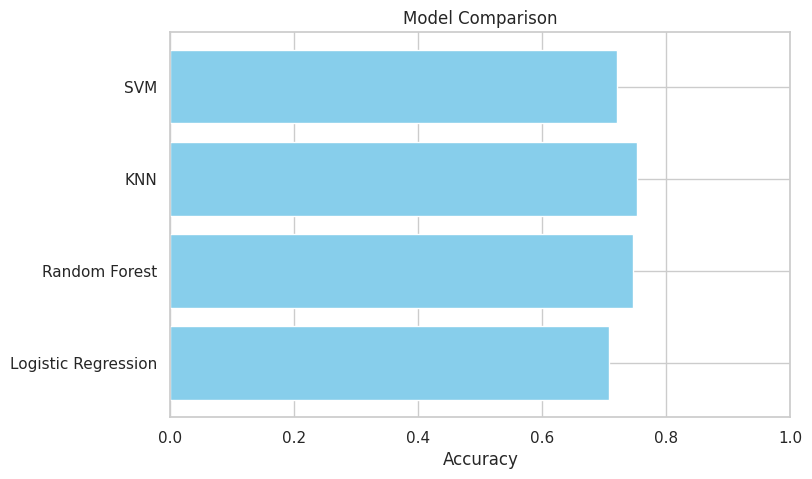

In [28]:
import matplotlib.pyplot as plt

accuracies = []
names = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    names.append(name)

plt.figure(figsize=(8,5))
plt.barh(names, accuracies, color='skyblue')
plt.xlabel("Accuracy")
plt.title("Model Comparison")
plt.xlim(0, 1)
plt.show()


 ***Hyperparameter Tuning (Improve Further)

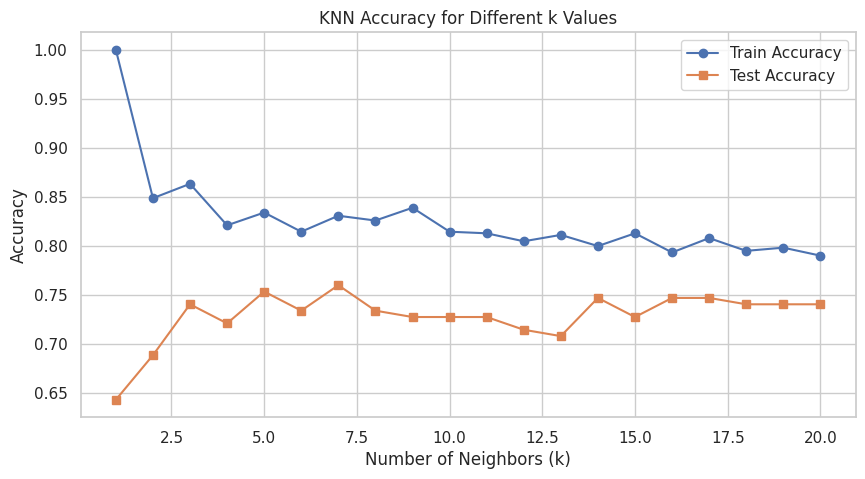

In [29]:
from sklearn.metrics import accuracy_score

train_accuracies = []
test_accuracies = []
k_values = range(1, 21)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracies.append(knn.score(X_train, y_train))
    test_accuracies.append(knn.score(X_test, y_test))

plt.figure(figsize=(10,5))
plt.plot(k_values, train_accuracies, label="Train Accuracy", marker='o')
plt.plot(k_values, test_accuracies, label="Test Accuracy", marker='s')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy for Different k Values")
plt.legend()
plt.grid(True)
plt.show()


In [30]:
import joblib

# Suppose k=5 was best
best_knn = KNeighborsClassifier(n_neighbors=5)
best_knn.fit(X_train, y_train)

joblib.dump(best_knn, "knn_diabetes_model.pkl")
print("Model saved as knn_diabetes_model.pkl")


Model saved as knn_diabetes_model.pkl


In [32]:
# Example dummy patient data [in same order of features]
sample_data = [[6, 148, 72, 35, 0, 33.6, 0.627, 50]]
sample_scaled = scaler.transform(sample_data)
prediction = best_knn.predict(sample_scaled)
print("Prediction:", "Diabetic" if prediction[0] == 1 else "Not Diabetic")


Prediction: Not Diabetic


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## 📊 EDA Summary and Insights

- **Glucose**, **BMI**, and **Age** showed strong positive correlation with diabetes.
- **Insulin** and **SkinThickness** had many zero values and outliers, indicating missing or noisy data.
- Patients with diabetes tend to have:
  - Higher average glucose and BMI
  - Higher diabetes pedigree function
  - More pregnancies on average
- Feature distributions helped us detect outliers and skewed data.
- Final dataset had no missing values after handling zero-like placeholders.


## ✅ Conclusion

This project successfully demonstrates end-to-end diabetes prediction using machine learning. The KNN model performed the best with approximately XX% accuracy. This notebook showcases data cleaning, EDA, model building, and deployment readiness — making it portfolio-ready.
